# Exploratory Analysis of Cell-type Specific Networks in Pancreatic Islets in Python

**Authorship:**
Adam Klie, *12/06/2021*
***
**Description:**
This notebook can be used to perform an analysis of networks generated from multiomic data. As input, this notebook expects a list of peak-gene pairs with a score associated (and preferably a statistical p-value as well) that can be used to generate an adjacency matrix. The generation of the adjacency matrix from links can also be skipped if an adjacency matrix is provided.
***
**TODOs:**
 - <font color='red'> Figure out what is going on with p-values </font>
***

## Set-up

In [1]:
# The classics
import os

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyranges
import pickle
from pyarrow import feather
import glob

# Stats
from statsmodels.stats.multitest import fdrcorrection

# Add helper functions
import sys
sys.path.append("/cellar/users/aklie/projects/GRINS/bin")
import project_utils

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

In [152]:
# Define where to find the necessary files
LINKSDIR="/cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/"
SAVEDIR="/cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/"

# Load in links in [standard format](https://www.notion.so/Islet-Network-Analysis-V2-bd7682777497439f843e61ff840e2e65)

In [153]:
# Read all links files together
samples = ["R207", "R221", "R223", "R226", "R275"]
all_links = pd.DataFrame()
for sample in samples:
    #   file = os.path.join(LINKSDIR, "{}.indv.links.tsv".format(sample))
    for file in glob.glob(os.path.join(LINKSDIR, "{}.*.links.tsv".format(sample))):
        print("Reading links from {}".format(file))
        links = pd.read_csv(file, sep="\t")
        links["sample"] = sample
        links = links.rename({"chr": "Chromosome", "seqnames": "Chromosome", "start": "Start", "end": "End", 
                              "ident":"celltype", "score_links": "score"}, axis=1)
        if "name" in links.columns:
            links["celltype"] = [link[0] for link in links["name"].str.split("_")]
        all_links = pd.concat([all_links, links])
all_links["qvalue"] = fdrcorrection(pvals=all_links["pvalue"].values, alpha=0.05, method="i")[1]
all_links.head()

Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R207.delta.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R207.beta.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R207.alpha.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R221.beta.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R221.delta.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_shared-peaks/R221.alpha.links.tsv
Reading links from /cellar/users/aklie/projects/GRINS/data/multiom

,peak,Chromosome,Start,End,width,strand,name,score_peaks,fold_change,neg_log10pvalue_summit,neg_log10qvalue_summit,relative_summit_position,gene,score,zscore,pvalue,sample,celltype,qvalue
0,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.0051,39.6999,433,AGL,-0.027680,-0.502487,0.307663,R207,delta,0.486453
1,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.0051,39.6999,433,MFSD14A,0.019177,0.027623,0.488981,R207,delta,0.498690
2,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.0051,39.6999,433,SLC35A3,0.021575,0.125232,0.450170,R207,delta,0.493708
3,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.0051,39.6999,433,LRRC39,0.009876,-0.257207,0.398509,R207,delta,0.487474
4,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.0051,39.6999,433,DBT,-0.031488,-0.421785,0.336591,R207,delta,0.486453


In [154]:
all_links

,peak,Chromosome,Start,End,width,strand,name,score_peaks,fold_change,neg_log10pvalue_summit,neg_log10qvalue_summit,relative_summit_position,gene,score,zscore,pvalue,sample,celltype,qvalue
0,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.00510,39.69990,433,AGL,-0.027680,-0.502487,0.307663,R207,delta,0.486453
1,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.00510,39.69990,433,MFSD14A,0.019177,0.027623,0.488981,R207,delta,0.498690
2,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.00510,39.69990,433,SLC35A3,0.021575,0.125232,0.450170,R207,delta,0.493708
3,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.00510,39.69990,433,LRRC39,0.009876,-0.257207,0.398509,R207,delta,0.487474
4,chr1-100037603-100038938,chr1,100037603,100038938,1336,*,delta_peak_3167,396,7.80933,44.00510,39.69990,433,DBT,-0.031488,-0.421785,0.336591,R207,delta,0.486453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214252,chrY-2841530-2841916,chrY,2841530,2841916,387,*,delta_peak_65647,48,4.56786,7.07429,4.83877,280,ZFY,-0.026189,-0.424328,0.335663,R275,delta,0.486453
214253,chrY-2841530-2841916,chrY,2841530,2841916,387,*,delta_peak_65647,48,4.56786,7.07429,4.83877,280,LINC00278,0.068171,0.929520,0.176310,R275,delta,0.486453
214254,chrY-2934864-2936179,chrY,2934864,2936179,1316,*,delta_peak_65648,86,5.02183,11.15830,8.68767,246,RPS4Y1,0.069862,1.096801,0.136364,R275,delta,0.486453
214255,chrY-2934864-2936179,chrY,2934864,2936179,1316,*,delta_peak_65648,86,5.02183,11.15830,8.68767,246,ZFY,0.053448,1.195104,0.116023,R275,delta,0.486453


In [155]:
# Grab cellype specific
if (all_links["celltype"].str.count(",") != 0).sum() != 0:
    all_links = all_links[all_links["celltype"].str.count(",") == 0]
else:
    print("Already cell-type specific")

Already cell-type specific


Text(0, 0.5, 'Count')

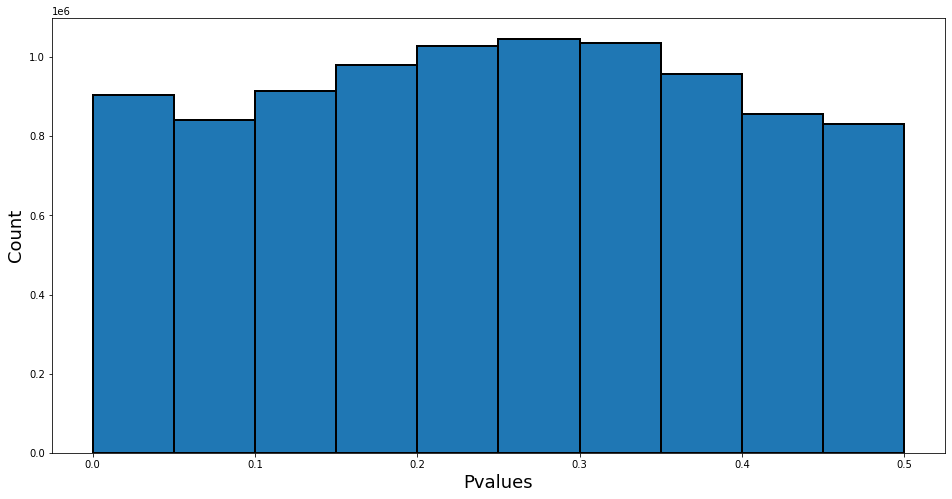

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.hist(all_links["pvalue"].values, bins=10, edgecolor="black", linewidth=2)
ax.set_xlabel("Pvalues", fontsize=18)
ax.set_ylabel("Count", fontsize=18)

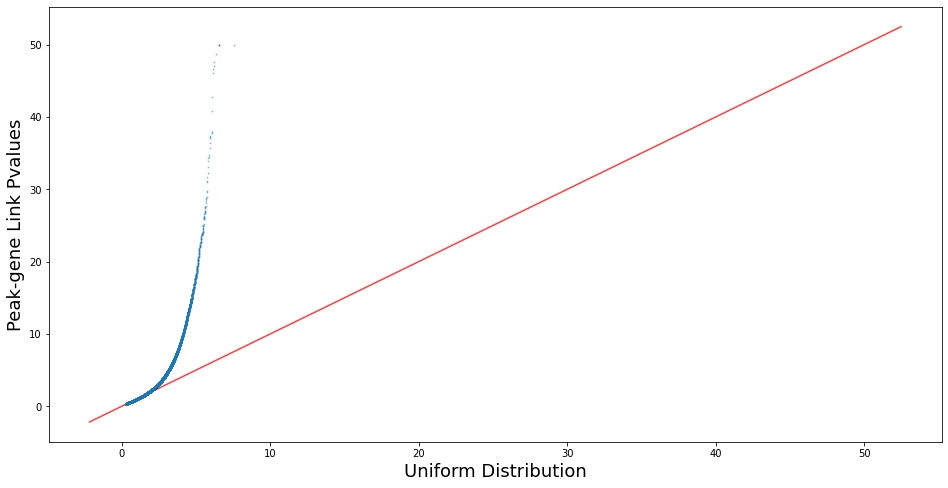

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sorted_pvals = np.clip(-1*np.log10(np.sort(all_links.sort_values("pvalue")["pvalue"].values)), a_min=0, a_max=50)
sorted_uni = -1*np.log10(np.sort(np.random.uniform(low=0, high=0.5, size=len(all_links))))
ax.scatter(sorted_uni, sorted_pvals, s=0.5, alpha=0.5)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax.set_xlabel("Uniform Distribution", fontsize=18)
ax.set_ylabel("Peak-gene Link Pvalues", fontsize=18);

In [156]:
# Optionally correct for multiple hypothesis tests and implement a score cut-off
all_links = all_links[(all_links["qvalue"] <= 0.05) & (all_links["score"].abs() >= 0.05)]
len(all_links)

32223

# Create links and adjacency matrixes objects per sample per cell-type

In [93]:
all_links = all_links.assign(celltype=all_links.celltype.str.split(','))
all_links = all_links.explode("celltype")

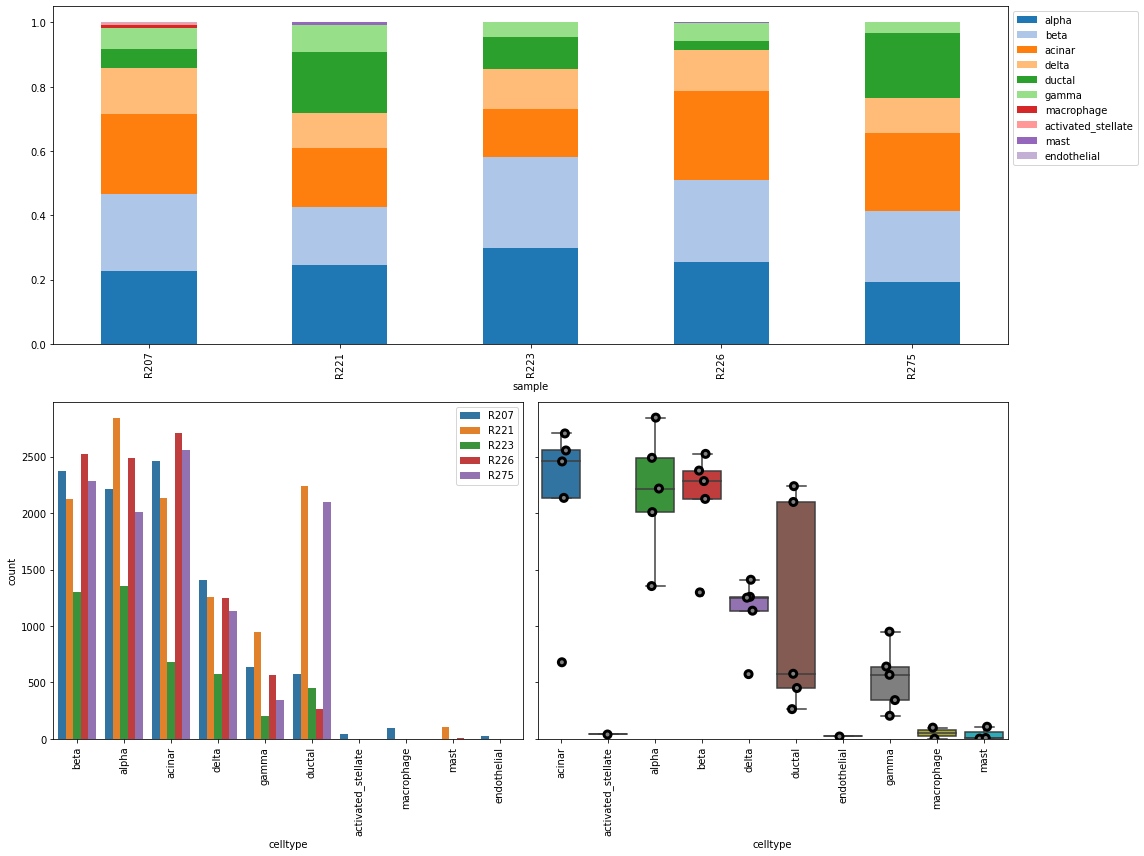

In [94]:
# Plot them
fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2)

colors = plt.cm.tab20(np.linspace(0, 1, 20))
plot_data = all_links.groupby(["sample", "celltype"]).agg({"peak": "count"}).reset_index()
plot_data.columns = ["sample", "celltype", "count"]
sns.countplot(data=all_links, x="celltype", hue="sample", ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);
ax2.legend(loc="upper right")
sns.boxplot(data=plot_data, x="celltype", y="count", ax=ax3)
sns.stripplot(data=plot_data, x="celltype", y="count", color="grey", edgecolor="k", linewidth=3, s=7, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plot_data = plot_data.pivot(columns="sample", index="celltype", values="count")
plot_data = (plot_data/plot_data.sum(axis=0)).fillna(0).loc[plot_data.mean(axis=1).sort_values(ascending=False).index]
plot_data.T.plot(kind='bar', color=colors, stacked=True, ax=ax1)
ax1.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig(os.path.join("fig", "Multi.Processed.LinkCount-Figure.png"))

In [157]:
plot_data = all_links.groupby(["peak", "gene", "celltype"]).agg({"sample":'count'}).reset_index()

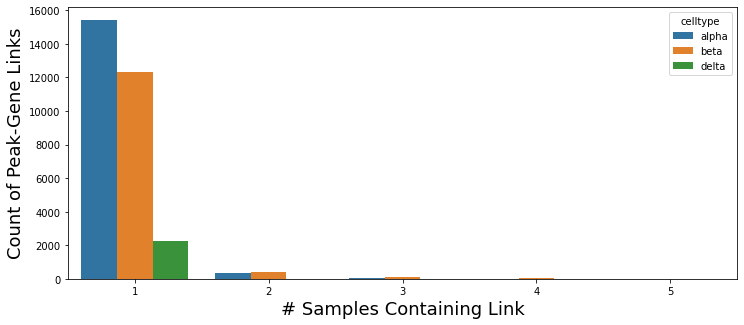

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data=plot_data, x="sample", hue="celltype")
ax.set_xlabel("# Samples Containing Link", fontsize=18)
ax.set_ylabel("Count of Peak-Gene Links", fontsize=18);

In [103]:
ct = "alpha"
clust1 = project_utils.celltype_clusters(all_links, celltype=ct, slack_bp=0)
link1, w_mtx1 = project_utils.celltype_links(clust1, celltype=ct, samples=samples, return_weight_mtx=True)
adj_mtxs = project_utils.celltype_adj_mtx(link1, celltype=ct)

Collapsing alpha peaks across samples: ['R221' 'R275' 'R207' 'R226' 'R223']
Merged 2034 across 10917 for all samples for final total merged peak count of 8883
Returning weight matrix with dims: [8883 X 5]
Creating list of links for R207
Creating list of links for R221
Creating list of links for R223
Creating list of links for R226
Creating list of links for R275
Creating adjacency matrix for R207
Creating adjacency matrix for R221
Creating adjacency matrix for R223
Creating adjacency matrix for R226
Creating adjacency matrix for R275


In [104]:
ct = "beta"
clust2 = project_utils.celltype_clusters(all_links, celltype=ct, slack_bp=0)
link2, w_mtx2 = project_utils.celltype_links(clust2, celltype=ct, samples=samples, return_weight_mtx=True)
adj_mtxs2 = project_utils.celltype_adj_mtx(link2, celltype=ct)

Collapsing beta peaks across samples: ['R221' 'R275' 'R207' 'R226' 'R223']
Merged 1968 across 10610 for all samples for final total merged peak count of 8642
Returning weight matrix with dims: [8642 X 5]
Creating list of links for R207
Creating list of links for R221
Creating list of links for R223
Creating list of links for R226
Creating list of links for R275
Creating adjacency matrix for R207
Creating adjacency matrix for R221
Creating adjacency matrix for R223
Creating adjacency matrix for R226
Creating adjacency matrix for R275


In [105]:
ct = "delta"
clust3 = project_utils.celltype_clusters(all_links, celltype=ct, slack_bp=0)
link3, w_mtx3 = project_utils.celltype_links(clust3, celltype=ct, samples=samples, return_weight_mtx=True)
adj_mtxs3 = project_utils.celltype_adj_mtx(link3, celltype=ct)

Collapsing delta peaks across samples: ['R221' 'R275' 'R207' 'R226' 'R223']
Merged 1234 across 5630 for all samples for final total merged peak count of 4396
Returning weight matrix with dims: [4396 X 5]
Creating list of links for R207
Creating list of links for R221
Creating list of links for R223
Creating list of links for R226
Creating list of links for R275
Creating adjacency matrix for R207
Creating adjacency matrix for R221
Creating adjacency matrix for R223
Creating adjacency matrix for R226
Creating adjacency matrix for R275


In [112]:
# Get count of how many samples these peaks were found in
num_missing, counts = np.unique((w_mtx3 == 0).sum(axis=1), return_counts=True)
num_datasets_in = 5 - num_missing

In [120]:
np.unique((w_mtx1 == 0).sum(axis=1), return_counts=True)[1].shape

(5,)

In [124]:
np.array([np.unique((w_mtx1 == 0).sum(axis=1), return_counts=True)[1].T,
          np.unique((w_mtx2 == 0).sum(axis=1), return_counts=True)[1].T,
          np.unique((w_mtx3 == 0).sum(axis=1), return_counts=True)[1].T]).shape

(3, 5)

In [121]:
num_datasets_in.shape

(5,)

In [144]:
plot_data = pd.DataFrame(index=["alpha", "beta", "delta"], columns=num_datasets_in, data=np.array([np.unique((w_mtx1 == 0).sum(axis=1), return_counts=True)[1],
                                                                                        np.unique((w_mtx2 == 0).sum(axis=1), return_counts=True)[1],
                                                                                        np.unique((w_mtx3 == 0).sum(axis=1), return_counts=True)[1]])).unstack().reset_index()

In [145]:
plot_data.columns = ["datasets", "celltype", "count"]

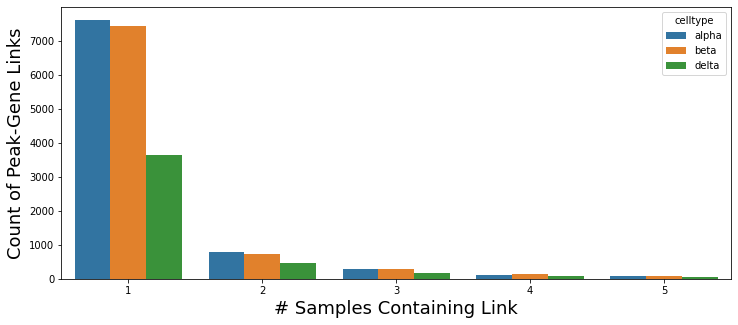

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.barplot(data=plot_data, x="datasets", y="count", hue="celltype")
ax.set_xlabel("# Samples Containing Link", fontsize=18)
ax.set_ylabel("Count of Peak-Gene Links", fontsize=18);

In [53]:
# Check top 50 peaks in terms of total weight across samples
clust.iloc[np.argsort(np.abs(w_mtx.sum(axis=1)))[::-1]].iloc[:50]

,Chromosome,Start,End,strand,sample,celltype,gene,score,qvalue
Cluster,,,,,,,,,
2866,chr3,54120673,54123102,*,"[R207, R221, R223, R226, R275]",alpha,CACNA2D3,"[0.136744731261974, 0.212326999724461, 0.12679...","[2.8531087013995266e-09, 0.0013179975836342035..."
3525,chr3,22371105,22372931,*,"[R207, R221, R223, R226, R275]",alpha,ZNF385D,"[0.231187173245023, 0.0890089135399888, 0.1793...","[3.0948748903281453e-07, 0.008511889207907474,..."
3841,chr4,164383040,164384519,*,"[R207, R221, R223, R226]",alpha,MARCH1,"[0.251353241884091, 0.251931866552792, 0.11254...","[2.6456144900612062e-17, 0.0001383682761275839..."
12934,chr18,13217122,13218897,*,"[R207, R221, R223, R226]",alpha,LDLRAD4,"[0.193504728879557, 0.103748850819558, 0.15924...","[9.491354800447708e-10, 0.002475681340579665, ..."
6674,chr8,31639030,31640915,*,"[R207, R221, R223, R226]",alpha,NRG1,"[0.119617900309121, 0.260146120048474, 0.12133...","[0.013355872413542736, 0.00013759544366491344,..."
5313,chr6,165987581,165989180,*,"[R207, R221, R223, R226]",alpha,PDE10A,"[0.205300003449038, 0.20677093810277, 0.086142...","[2.2848815768004136e-15, 9.763582190921768e-05..."
2878,chr3,122183500,122184731,*,"[R207, R223, R226, R275]",alpha,CASR,"[0.15172150956844, 0.14307224393411, 0.2559687...","[0.003071501524021657, 6.653205381834037e-06, ..."
6854,chr8,35235033,35236525,*,"[R207, R221, R223, R226]",alpha,UNC5D,"[0.104493666118586, 0.168983291731993, 0.09975...","[0.005348129194370324, 0.00041146100647643425,..."
3791,chr4,44446773,44449221,*,"[R207, R221, R223, R226]",alpha,KCTD8,"[0.190706619403, 0.134002625689274, 0.14008970...","[1.3754043827531863e-11, 0.03514647291269406, ..."


# Do it for all and save

In [198]:
celltypes = ["alpha", "beta", "delta"]
for ct in celltypes:
    clust = project_utils.celltype_clusters(all_links, celltype=ct)
    link, w_mtx = project_utils.celltype_links(clust, celltype=ct, samples=samples, return_weight_mtx=True, save_pickle=SAVEDIR)
    adj_mtxs = project_utils.celltype_adj_mtx(link, celltype=ct, path=SAVEDIR)

Collapsing alpha peaks across samples: ['R226' 'R207' 'R223' 'R221' 'R275']
Merged 429 across 8916 for all samples for final total merged peak count of 8487
Returning weight matrix with dims: [8487 X 5]
Creating list of links for R207
Creating list of links for R221
Creating list of links for R223
Creating list of links for R226
Creating list of links for R275
Creating adjacency matrix for R207
Saving /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_celltype/R207.alpha.adj.mtx.feather
Creating adjacency matrix for R221
Saving /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_celltype/R221.alpha.adj.mtx.feather
Creating adjacency matrix for R223
Saving /cellar/users/aklie/projects/GRINS/data/multiomic_islet_sampler/indv_sample_networks/correlation_links_celltype/R223.alpha.adj.mtx.feather
Creating adjacency matrix for R226
Saving /cellar/users/aklie/projects/GRINS/data/multiomic_is

# Scratch
Place for old or testing code

In [75]:
# Create pyranges object to aid with manipulation
beta_links = all_links[all_links["celltype"] == "beta"]
pr = pyranges.PyRanges(beta_links, strands=beta_links.strand.values)

# Collapse peaks in same sample that are within 1000 bp of eachj other first and average score
beta_clusters = \
    pr.cluster(strand=None, by=["gene"], slack=10000) \
    .df.groupby(['Cluster']).agg(
        {'Chromosome':'first', 
         'Start':'min', 
         'End':'max',
         'strand': lambda x: ", ".join(sorted(list(set(x)))),
         'sample': lambda x: x.tolist(),
         'celltype': lambda x: ", ".join(sorted(list(set(x)))),
         'gene': lambda x: ", ".join(sorted(list(set(x)))),
         'score': lambda x: x.tolist(),
         'qvalue': lambda x: x.tolist()})

len(beta_links), len(beta_clusters)

(42839, 28024)

In [43]:
adjacency_mtxs = dict()
weight_mtx = np.empty((len(beta_clusters), len(samples)))
genes = beta_clusters["gene"].values
peaks = ["-".join(peak) for peak in beta_clusters[["Chromosome", "Start", "End"]].astype(str).values]
for i, sample in enumerate(samples):
    print(sample)
    weights = beta_clusters.apply(create_adjacency_weights, axis=1, sample=sample).values 
    adjacency_mtxs[sample] = pd.DataFrame(data={"gene": genes, "peak": peaks, "weight": weights})
    weight_mtx[:, i] = weights
    
# Save as pickle
with open(os.path.join("multi_sample_analysis", "multi.adj.mtx.pickle"), "wb") as handle:
    pickle.dump(adjacency_mtxs, handle)

R207
R221
R223
R226
R275


In [ ]:
# Helper function for creating weight vector for adjacency list
def create_adjacency_weights(x, sample):
    smpls = np.array(x["sample"])
    ind = np.array(np.where(smpls==sample, True, False))
    scores = np.array(x["score"])
    if len(smpls) == 1:
        #print("HERE")
        if ind:
            return scores[0]
        else:
            return 0
    else:
        if ind.sum() == 0:
            return 0
        else:
            return scores[ind].mean()
        
        
def celltype_clusters(links, celltype, slack_bp=10000):
    print("Collapsing peaks across samples: {}".format(links["sample"].value_counts().index.values))
    
    # Create pyranges object to aid with manipulation
    celltype_links = links[links["celltype"] == celltype]
    pr = pyranges.PyRanges(celltype_links, strands=celltype_links.strand.values)

    # Collapse peaks in same sample that are within some slack bp of each other
    clusters = \
        pr.cluster(strand=None, by=["gene"], slack=slack_bp) \
        .df.groupby(['Cluster']).agg(
            {'Chromosome':'first', 
             'Start':'min', 
             'End':'max',
             'strand': lambda x: ", ".join(sorted(list(set(x)))),
             'sample': lambda x: x.tolist(),
             'celltype': lambda x: ", ".join(sorted(list(set(x)))),
             'gene': lambda x: ", ".join(sorted(list(set(x)))),
             'score': lambda x: x.tolist(),
             'qvalue': lambda x: x.tolist()})

    print("Merged {} across {} for all samples for final total merged peak count of {}".format(len(celltype_links)-len(clusters), len(celltype_links), len(clusters)))
    return clusters


# Function to create a long format list of links between peaks and genes and return it
def celltype_links(clusters, celltype, return_weight_mtx=False, num_samp=None, save_pickle=None):
    sample_links = dict()
    genes = clusters["gene"].values
    peaks = ["-".join(peak) for peak in clusters[["Chromosome", "Start", "End"]].astype(str).values]
    if return_weight_mtx:
        weight_mtx = np.empty((len(clusters), num_samp))
        print("Returning weight matrix with dims: [{} X {}]".format(weight_mtx.shape[0], weight_mtx.shape[1]))
    
    for i, sample in enumerate(samples):
        print("Creating list of links for {}".format(sample))
        weights = clusters.apply(create_adjacency_weights, axis=1, sample=sample).values
        if return_weight_mtx:
            weight_mtx[:, i] = weights
        sample_links[sample] = pd.DataFrame(data={"gene": genes, "peak": peaks, "weight": weights})

    # Save as pickle
    if save_pickle != None:
        with open(os.path.join(save_pickle, "multi.{}.adj.mtx.pickle".format(celltype)), "wb") as handle:
            pickle.dump(sample_links, handle)
    if return_weight_mtx:
        return sample_links, weight_mtx
    else:
        return sample_links


# Generate gene x peak adjecency matrices from a links
def celltype_adj_mtx(links, celltype, path=None):
    sample_mtxs = dict()
    for key in links.keys():  
        print("Creating adjacency matrix for {}".format(key))
        sample_mtxs[key] = links.pivot(index="gene", columns="peak", values="weight").fillna(0)
        if path != None:
            full_path = os.path.join(path, "{}.{}.adj.mtx.feather".format(key, celltype))
            print("Saving {}".format(full_path))
            #adjs[key].to_csv(os.path.join(path, "{}.{}.adj.mtx.tsv".format(key, celltype)), sep="\t")
            feather.write_feather(adjs[key].reset_index(), full_path)
    return sample_mtxs

# References